In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
file1 = 'twitterapi/030120.csv'
file2 = 'twitterapi/031520.csv'
file3 = 'twitterapi/040120.csv'
file4 = 'twitterapi/041520.csv'
file5 = 'twitterapi/050120.csv'
file6 = 'twitterapi/051520.csv'

In [3]:
twitter_mar_01 = pd.read_csv(file1)
twitter_mar_15 = pd.read_csv(file2)
twitter_apr_01 = pd.read_csv(file3)
twitter_apr_15 = pd.read_csv(file4)
twitter_may_01 = pd.read_csv(file5)
twitter_may_15 = pd.read_csv(file6)

/Users/jameswhite/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
twitter_mar_01.dtypes

coordinates                    object
created_at                     object
hashtags                       object
media                          object
urls                           object
favorite_count                  int64
id                              int64
in_reply_to_screen_name        object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
lang                           object
place                          object
possibly_sensitive             object
retweet_count                   int64
retweet_id                    float64
retweet_screen_name            object
source                         object
text                           object
tweet_url                      object
user_created_at                object
user_screen_name               object
user_default_profile_image       bool
user_description               object
user_favourites_count           int64
user_followers_count            int64
user_friends_count              int64
user_listed_

In [5]:
twitter_mar_01 = twitter_mar_01[['id', 'created_at', 'place', 'retweet_count']]
twitter_mar_01['created_at'] = [x.split('12')[0] for x in twitter_mar_01['created_at']]
twitter_mar_15 = twitter_mar_15[['id', 'created_at', 'place', 'retweet_count']]
twitter_mar_15['created_at'] = [x.split('12')[0] for x in twitter_mar_15['created_at']]
twitter_apr_01 = twitter_apr_01[['id', 'created_at', 'place', 'retweet_count']]
twitter_apr_01['created_at'] = [x.split('12')[0] for x in twitter_apr_01['created_at']]
twitter_apr_15 = twitter_apr_15[['id', 'created_at', 'place', 'retweet_count']]
twitter_apr_15['created_at'] = [x.split('12')[0] for x in twitter_apr_15['created_at']]
twitter_may_01 = twitter_may_01[['id', 'created_at', 'place', 'retweet_count']]
twitter_may_01['created_at'] = [x.split('12')[0] for x in twitter_may_01['created_at']]
twitter_may_15 = twitter_may_15[['id', 'created_at', 'place', 'retweet_count']]
twitter_may_15['created_at'] = [x.split('12')[0] for x in twitter_may_15['created_at']]

In [6]:
twitter_mar = twitter_mar_01.merge(twitter_mar_15, how='outer')
twitter_apr = twitter_apr_01.merge(twitter_apr_15, how='outer')
twitter_may = twitter_may_01.merge(twitter_may_15, how='outer')

In [7]:
march = twitter_mar[twitter_mar['place'].notna()]

In [8]:
march

,id,created_at,place,retweet_count
66,1234090090743451650,Sun Mar 01,"Pennsylvania, USA",0
232,1234090114340487174,Sun Mar 01,"Rovereto, Trentino-Alto Adige",0
485,1234090142169780225,Sun Mar 01,"Hillsdale, NJ",0
605,1234090154408673283,Sun Mar 01,"Annot, France",0
641,1234090163418148864,Sun Mar 01,"Wandsworth, London",0
...,...,...,...,...
98926,1239171230273548289,Sun Mar 15,"San Antonio, TX",0
99001,1239171238788050944,Sun Mar 15,"Woking, South East",0
99028,1239171238515421184,Sun Mar 15,"Zutphen, Nederland",8
99034,1239171234623037440,Sun Mar 15,"Mendoza, Argentina",0


In [9]:
april = twitter_apr[twitter_apr['place'].notna()]

In [10]:
april

,id,created_at,place,retweet_count
25,1245322458921676801,Wed Apr 01,"Crediton, England",0
46,1245322458149933062,Wed Apr 01,"West Midlands, England",0
155,1245322470808223745,Wed Apr 01,"Tuusula, Suomi",1
305,1245322487421755392,Wed Apr 01,"Nairobi, Kenya",0
362,1245322496162717696,Wed Apr 01,"Vijayawada, India",0
...,...,...,...,...
75223,1250407305306238976,Wed Apr 15,"Gurgaon, India",24
75240,1250407312671395841,Wed Apr 15,"Sumedang Utara, Indonesia",0
75558,1250407347094196225,Wed Apr 15,"Kampala, Uganda",1
75574,1250407346041286656,Wed Apr 15,Saravanampatti,1


In [11]:
may = twitter_may[twitter_may['place'].notna()]

In [40]:
may['place'].value_counts()

New Delhi, India              18
Brooklyn, NY                  11
Mumbai, India                  9
Rio de Janeiro, Brazil         9
Chicago, IL                    5
                              ..
Sri Lanka                      1
Miranda, Venezuela             1
Michigan, USA                  1
Jamshedpur, India              1
Marnes-la-Coquette, France     1
Name: place, Length: 560, dtype: int64

/Users/jameswhite/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1372: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


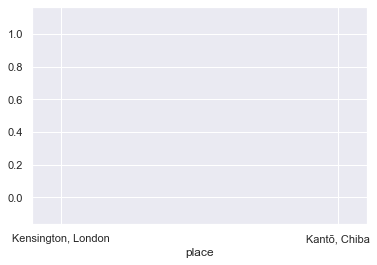